In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from pandas.plotting import scatter_matrix

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split


In [4]:
camera_data = pd.read_csv('camera_dataset.csv')
camera_data

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


In [5]:
#camera_data.drop(['Model', 'Release date'], axis=1, inplace=True)
camera_data.drop('Model', axis=1, inplace=True)
camera_data

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


In [6]:
camera_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Release date             1038 non-null   int64  
 1   Max resolution           1038 non-null   float64
 2   Low resolution           1038 non-null   float64
 3   Effective pixels         1038 non-null   float64
 4   Zoom wide (W)            1038 non-null   float64
 5   Zoom tele (T)            1038 non-null   float64
 6   Normal focus range       1038 non-null   float64
 7   Macro focus range        1037 non-null   float64
 8   Storage included         1036 non-null   float64
 9   Weight (inc. batteries)  1036 non-null   float64
 10  Dimensions               1036 non-null   float64
 11  Price                    1038 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 97.4 KB


In [7]:
camera_data.describe()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1037.000000,1036.000000,1036.000000,1036.000000,1038.000000
mean,2003.590559,2474.672447,1773.936416,4.596339,32.963391,121.525048,44.145472,7.787850,17.447876,319.265444,105.363417,457.384393
std,2.724755,759.513608,830.897955,2.844044,10.333149,93.455422,24.141959,8.100081,27.440655,260.410137,24.262761,760.452918
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1120.000000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,226.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,350.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


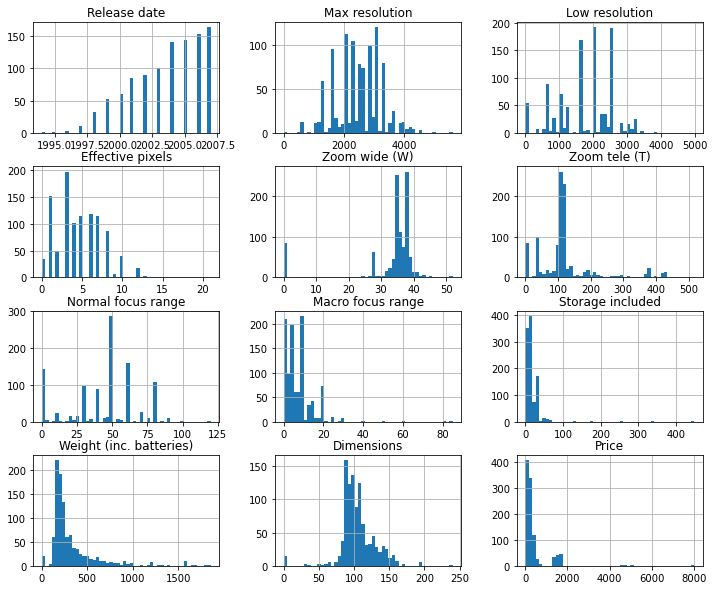

In [8]:
camera_data.hist(bins=50, figsize=(12,10));

In [9]:
#Random sampling (0) or strattified sampling (1)

det_value = 0   #Determinate

if det_value == 0:
    print('Random Sampling Used')
    strat_train_set, strat_test_set = train_test_split(camera_data, test_size=0.2, random_state=42)
    try:
        camera_data.drop('Price_cat', axis=1, inplace=True)
    except KeyError:
        None
        
else:
    print('Stratified Sampling Used')
    camera_data['Price_cat'] = pd.cut(camera_data['Price'],
                                    bins=[0,170,1000,np.inf],
                                    labels=[1,2,3])
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in split.split(camera_data, camera_data["Price_cat"]):
        strat_train_set = camera_data.loc[train_index]
        strat_test_set = camera_data.loc[test_index]
    camera_data.Price_cat.hist();
    print(strat_test_set['Price_cat'].value_counts() / len(strat_test_set))
    

#camera_data.drop('Price_cat', axis=1, inplace=True)
camera_data

Random Sampling Used


,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


### Correlation

In [10]:
camera_train = strat_train_set.copy()
camera_train

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
950,2002,2048.0,1600.0,3.0,39.0,117.0,50.0,10.0,16.0,214.0,114.0,149.0
405,2001,1800.0,900.0,2.0,38.0,38.0,75.0,22.0,8.0,225.0,120.0,129.0
514,2001,2048.0,1600.0,3.0,38.0,152.0,30.0,2.0,16.0,420.0,138.0,159.0
411,2002,2448.0,2160.0,4.0,35.0,70.0,50.0,7.0,16.0,260.0,116.0,129.0
493,2001,2560.0,1600.0,4.0,28.0,85.0,50.0,2.0,32.0,414.0,102.0,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...
87,2001,2272.0,1600.0,3.0,35.0,105.0,80.0,10.0,16.0,323.0,112.0,139.0
330,2005,2576.0,2048.0,5.0,36.0,108.0,80.0,12.0,16.0,190.0,97.0,179.0
466,2006,2816.0,2048.0,6.0,28.0,102.0,50.0,5.0,16.0,155.0,94.0,509.0
121,2007,3072.0,2592.0,7.0,39.0,390.0,50.0,10.0,0.0,260.0,89.0,139.0


In [11]:
camera_train_corr_price =  camera_train.corr()['Price'].sort_values(ascending=False)
camera_train_corr_price

Price                      1.000000
Weight (inc. batteries)    0.459988
Dimensions                 0.279714
Max resolution             0.143456
Effective pixels           0.138046
Low resolution             0.111367
Release date              -0.038988
Storage included          -0.093115
Macro focus range         -0.120844
Zoom tele (T)             -0.177694
Normal focus range        -0.271171
Zoom wide (W)             -0.442234
Name: Price, dtype: float64

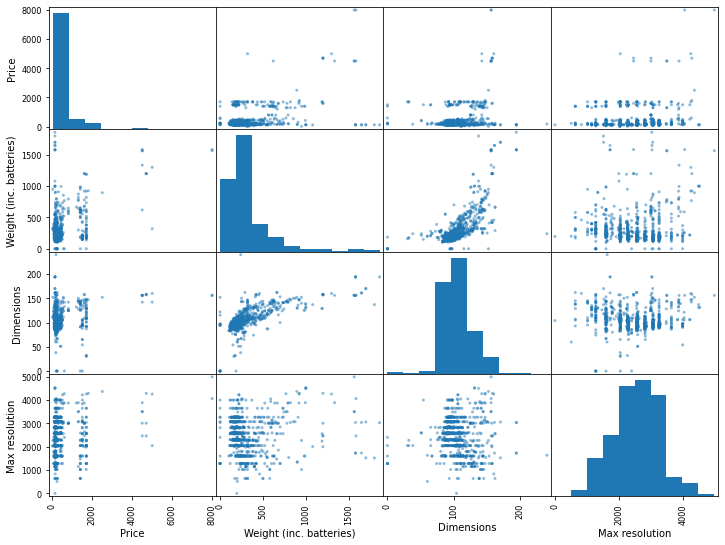

In [12]:
scatter_matrix(camera_train[camera_train_corr_price.index[:4]], figsize=(12,9));

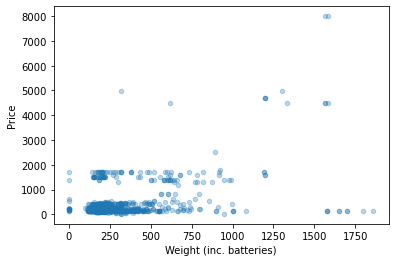

In [13]:
camera_train.plot(kind='scatter', y='Price', x='Weight (inc. batteries)', alpha=0.3);

## Prepare the Data for Machine Learning Algorithms

### Data Cleaning

In [14]:
#Our data don't has categorical values

camera_train = strat_train_set #raw data
#camera_train_labels = strat_train_set['Price'].copy()

In [15]:
camera_train.shape

(830, 12)

In [16]:
# Loking for NaN
np.any(camera_train.isna())  #camera_train.shape

True

In [17]:
camera_train.dropna(inplace=True)

In [18]:
camera_train.shape

(829, 12)

In [19]:
#List of features

camera_train.columns

Index(['Release date', 'Max resolution', 'Low resolution', 'Effective pixels',
       'Zoom wide (W)', 'Zoom tele (T)', 'Normal focus range',
       'Macro focus range', 'Storage included', 'Weight (inc. batteries)',
       'Dimensions', 'Price'],
      dtype='object')

In [20]:
np.where(camera_train['Zoom wide (W)'] == 0) 

(array([ 35,  44,  48,  53,  61,  82, 101, 121, 128, 149, 162, 197, 236,
        240, 241, 255, 263, 266, 276, 305, 322, 369, 379, 396, 402, 406,
        407, 411, 413, 443, 456, 470, 508, 510, 517, 530, 536, 551, 554,
        561, 574, 575, 616, 617, 637, 657, 664, 668, 671, 691, 706, 710,
        718, 730, 733, 734, 746, 748, 750, 756, 761, 776, 794, 796, 804,
        807, 809, 811], dtype=int64),)

In [21]:
camera_train_labels = camera_train['Price']
camera_train.drop('Price', axis=1, inplace=True)

In [22]:
#Features that shouldn't have 0.0. Ref: https://www.statology.org/pandas-drop-rows-with-value/

def features_without_zero(some_data, some_data_labels, list_of_features_without_zero, num_value=0):

    for feature in list_of_features_without_zero:
        a_idx = some_data[feature] != num_value
        some_data = some_data[a_idx]
        some_data_labels = some_data_labels[a_idx]
    return some_data, some_data_labels


some_features_without_0 = ['Weight (inc. batteries)', 'Dimensions', 'Max resolution', 
                            'Low resolution', 'Effective pixels']

camera_train, camera_train_labels = features_without_zero(camera_train, camera_train_labels, 
                                                            some_features_without_0)

### Transformation Pipelines

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
_pipeline = Pipeline([
    ('minMax_scaler', StandardScaler()),
])


camera_train_prepared = _pipeline.fit_transform(camera_train)

## Select and Train a Model

### Training and Evaluating on the Training Set

#### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
some_data = camera_train[:5]
some_labels = camera_train_labels[:5]
some_data_prepared, some_labels_prepared = features_without_zero(some_data, some_labels, some_features_without_0)
some_data_prepared = _pipeline.transform(some_data_prepared)

In [27]:
#Using linear regression
lin_reg = LinearRegression()
lin_reg.fit(camera_train_prepared, camera_train_labels)     

print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels_prepared))

Predictions: [137.68087954 289.57496362 391.66796625 298.14295121 660.79273095]
Labels: [149.0, 129.0, 159.0, 129.0, 229.0]


In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
#Calculating rmse
lin_reg_predic = lin_reg.predict(some_data_prepared)
lin_reg_mse = mean_squared_error(lin_reg_predic, some_labels_prepared)
np.sqrt(lin_reg_mse)   

242.94078471822124

#### Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(camera_train_prepared, camera_train_labels)   #Fit with train data

tree_reg_predic = tree_reg.predict(some_data_prepared)
tree_reg_mse = mean_squared_error(some_labels_prepared, tree_reg_predic)   # some_labels_prepared, tree_reg_predic
np.sqrt(tree_reg_mse)    #overfit                                          # are like cross val data 

0.0

### Better Evaluation Using Cross-Validation

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
scores = cross_val_score(tree_reg, camera_train_prepared, camera_train_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [34]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


display_scores(tree_rmse_scores)

Scores: [442.85493486 635.18315469 361.93345613 380.2669238  645.16884612
 800.71954308 864.40573807 653.84955456 780.03558039 396.35225256]
Mean: 596.0769984243847
Standard deviation: 178.8185600737616


In [35]:
lin_scores = cross_val_score(lin_reg, camera_train_prepared, camera_train_labels,
                            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)  #Almost same performance that lin_reg

Scores: [471.51681392 595.69667938 541.2791604  381.57063333 741.4756922
 496.87083479 814.21977659 458.86449723 898.66236294 442.60480471]
Mean: 584.2761255484139
Standard deviation: 166.02601126888015


#### Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
forest_reg = RandomForestRegressor()
forest_reg.fit(camera_train_prepared, camera_train_labels)

forest_reg_predic = forest_reg.predict(some_data_prepared)

forest_scores = cross_val_score(forest_reg, camera_train_prepared, camera_train_labels,
                                    scoring="neg_mean_squared_error", cv=10) 
forest_rmse_scores = np.sqrt(- forest_scores)
display_scores(forest_rmse_scores)   #Better performance

Scores: [323.10377377 348.07323859 312.04529605 295.02083966 577.49545388
 427.70923415 604.61126248 402.84322285 683.8520087  405.57430237]
Mean: 438.0328632507003
Standard deviation: 129.47988704344692


## Fine-Tune Your Model

### Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},                #12 + 6 = 18 combinations
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,4]}   #
]


forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                            return_train_score=True)
grid_search.fit(camera_train_prepared, camera_train_labels)

grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [40]:
#grid_search.cv_results_   #To see the results.
            #We have 5 split_test_score 'cause we're have K Folds with cv=5
            #The lennght of every param is 18 acording to the combinations. 

#pd.DataFrame(grid_search.cv_results_)        

In [41]:
cvres = grid_search.cv_results_  
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


#ref GridSearchCV.cv_results_: https://stackoverflow.com/questions/54608088/what-is-gridsearch-cv-results-could-any-explain-all-the-things-in-that-i-e-me


567.6574657387623 {'max_features': 2, 'n_estimators': 3}
500.1316339032761 {'max_features': 2, 'n_estimators': 10}
475.8501873494763 {'max_features': 2, 'n_estimators': 30}
514.2043751487615 {'max_features': 4, 'n_estimators': 3}
478.70612678725087 {'max_features': 4, 'n_estimators': 10}
451.09779248243325 {'max_features': 4, 'n_estimators': 30}
513.2350399143934 {'max_features': 6, 'n_estimators': 3}
487.2449408693355 {'max_features': 6, 'n_estimators': 10}
469.9861188756932 {'max_features': 6, 'n_estimators': 30}
548.2289169703073 {'max_features': 8, 'n_estimators': 3}
498.85477956192057 {'max_features': 8, 'n_estimators': 10}
469.88844573065575 {'max_features': 8, 'n_estimators': 30}
567.5316337885786 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
480.5752379367271 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
534.1972991257433 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
494.4128661271223 {'bootstrap': False, 'max_features': 3, 'n_estimators'

###  RandomizedSearchCV

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [43]:
rand_params = {
        'n_estimators': randint(1,20),
        'max_features': randint(1,9),
        #'criterion': np.random.choice(['squared_error', 'absolute_error', 'poisson']),
    }                                                                               #^-- This ',' is important

forest_reg = RandomForestRegressor()


grid_search = RandomizedSearchCV(forest_reg, param_distributions=rand_params, cv=5, n_iter=10, 
                            scoring='neg_mean_squared_error')#, verbose=2, return_train_score=True)

                            

In [44]:
grid_search.fit(camera_train_prepared, camera_train_labels)
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=17)

### valuate Your System on the Test Set

In [45]:
final_model = grid_search.best_estimator_

camera_test_data = strat_test_set.drop('Price', axis=1)
camera_test_labels = strat_test_set['Price'].copy()

camera_test_prepared, camera_test_labels_prepared = features_without_zero(camera_test_data, 
                                                                    camera_test_labels, some_features_without_0)

camera_test_prepared = _pipeline.fit_transform(camera_test_prepared)

test_predictions = final_model.predict(np.nan_to_num(camera_test_prepared))
test_mse = mean_squared_error(camera_test_labels_prepared, test_predictions)
test_rmse = np.sqrt(test_mse)
test_rmse

492.51564809146504

In [46]:
from scipy import stats

In [47]:
confidence = 0.95
squared_errors = (test_predictions - camera_test_labels_prepared) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([116.20659128, 686.76004206])